**E22CSEU0020**

**Akshat Aggarwal**

**Loading Libraries**

In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

**Ques:1**

In [2]:
# a)
class_data = pd.read_csv('classData.csv') #Loading the Dataset
fault_data = class_data.iloc[:, :4] # Selecting first four Columns

In [3]:
fault_data

,G,C,B,A
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
7856,0,0,0,0
7857,0,0,0,0
7858,0,0,0,0
7859,0,0,0,0


In [4]:
# b)
# Creating new Dataframe
def get_fault_type(row):
    if np.array_equal(row, [0, 0, 0, 0]):
        return "No Fault"
    elif np.array_equal(row, [1, 0, 0, 1]):
        return "LG Fault (Between Phase A and Gnd)"
    elif np.array_equal(row, [0, 0, 1, 1]):
        return "LL Fault (Between Phase A and Phase B)"
    elif np.array_equal(row, [1, 0, 1, 1]):
        return "LLG Fault (Between Phases A, B and ground)"
    elif np.array_equal(row, [0, 1, 1, 1]):
        return "LLL Fault (Between all three phases)"
    elif np.array_equal(row, [1, 1, 1, 1]):
        return "LLLG fault(Three phase symmetrical fault)"
    else:
        return "No Fault"

fault_data['Fault Type'] = fault_data.apply(get_fault_type, axis=1)

<IPython.core.display.Javascript object>

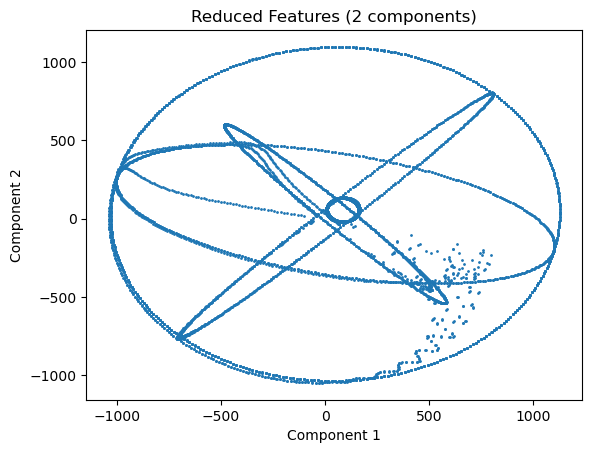

In [5]:
# C)
# Reducing the component (features) to 2 and plot
X = class_data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1)
plt.title('Reduced Features (2 components)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [6]:
# d) 
# Spliting the data into training and testing with a 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(fault_data.iloc[:, :4], fault_data['Fault Type'], test_size=0.25, random_state=42)

In [7]:
# e) 
# Fitting the model and predicting the faults for testing data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [8]:
# f) 
# Displaying the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Ques:2**

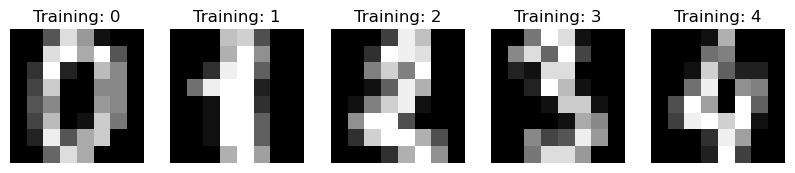

LinearDiscriminantAnalysis(n_components=4)

In [9]:
# a) 
# Load the dataset and plot the data
digits = load_digits()
data = digits.data
labels = digits.target

# Plot the data
num_rows = 1
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3))
for i in range(num_cols):
    axs[i].imshow(digits.images[i], cmap='gray')
    axs[i].set_title(f'Training: {i}')
    axs[i].axis('off')
plt.show()

# b) Getting the data and target, apply LDA
X = data
y = labels
tar = digits.target_names
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(data[:50000], labels[:50000])

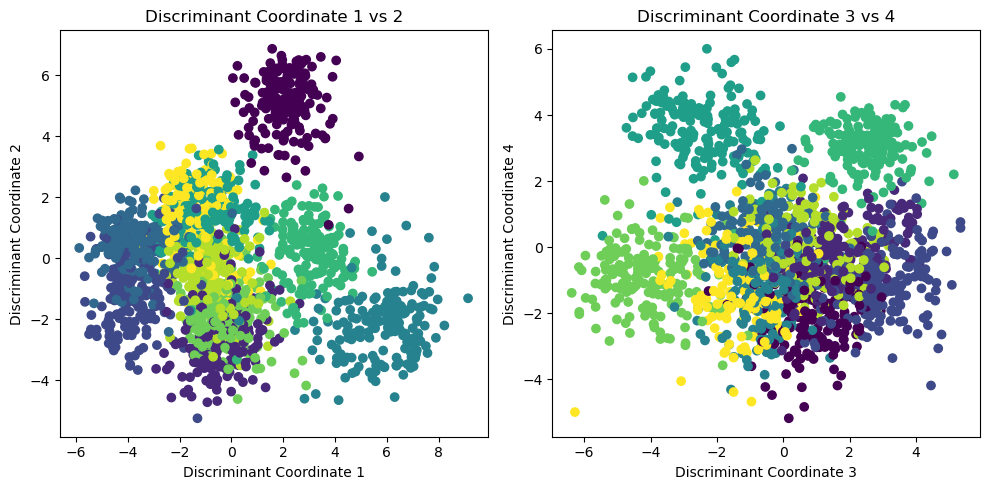

In [10]:
# c) 
# Visualizing transformed data
X_transformed = lda.transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='viridis')
plt.title('Discriminant Coordinate 1 vs 2')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')

plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 2], X_transformed[:, 3], c=labels, cmap='viridis')
plt.title('Discriminant Coordinate 3 vs 4')
plt.xlabel('Discriminant Coordinate 3')
plt.ylabel('Discriminant Coordinate 4')

plt.tight_layout()
plt.show()

**Ques:3**

In [11]:
# Loading the dataset
data = pd.read_csv('Random_Data.csv')
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [12]:
#a)
# Separating numerical, categorical, and target columns
numerical_cols = ['Age', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Ca']
categorical_cols_onehot = ['Sex', 'ChestPain']
categorical_cols_label = ['Slope', 'Thal']

# Imputing missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# One-hot encode categorical columns
encoder_onehot = OneHotEncoder(handle_unknown='ignore')
X_categorical_onehot = encoder_onehot.fit_transform(data[categorical_cols_onehot])

# Labelling encode categorical columns
encoder_label = LabelEncoder()
for col in categorical_cols_label:
    data[col] = encoder_label.fit_transform(data[col])

# Combining numerical, one-hot encoded, and label encoded columns
X = np.concatenate([data[numerical_cols], X_categorical_onehot.toarray(), data[categorical_cols_label]], axis=1)
y = data['AHD'].map({'Yes': 1, 'No': 0})

In [13]:
#b) 
# Dividing the dataset in training and testing by 80% and 20% respectively
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#c)
# Training the Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

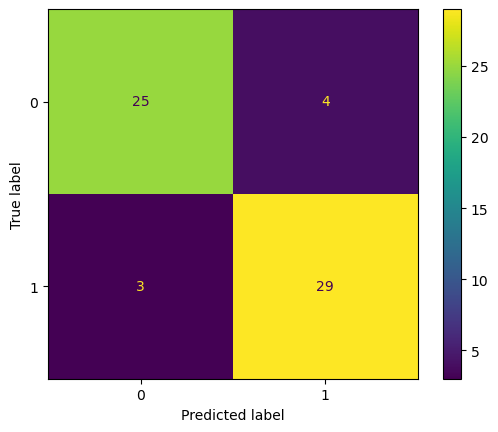

In [15]:
#d)
# Calculating and plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
#e)
# Calculating evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.885
Precision: 0.879
Recall: 0.906
F1-score: 0.892


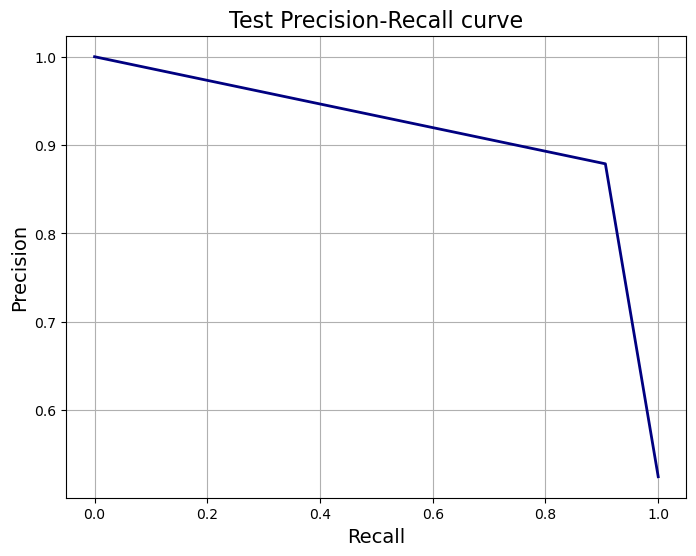

In [17]:
#f)
# Plotting precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='navy')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Test Precision-Recall curve', fontsize=16)
plt.grid()
plt.show()